Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pickle
from config import *
from os import path

Reading the train and test data into Pandas DataFrames

In [2]:
train_df = pd.read_csv(path.join(DATA_DIR, TRAIN_FILE))
test_df = pd.read_csv(path.join(DATA_DIR, TEST_FILE))

**Function: df_info(dataframe)**

Return type: dataframe

Logic:
    
    Compute column counts, null values, null percentages and value types for a given dataframe.

In [3]:
def df_info(dataframe):
    df_information = pd.DataFrame()
    df_information['Columns'] = dataframe.columns
    col_counts = []
    null_values = []
    value_type = []
    for col in df_information['Columns']:
        col_counts.append(len(dataframe[col]))
        null_values.append(dataframe[col].isnull().sum())
        value_type.append(dataframe[col].dtype)
    df_information['Column_Counts'] = col_counts
    df_information['Null_Values'] = null_values
    df_information['Null_Percent'] = (df_information['Null_Values'] / df_information['Column_Counts']) * 100
    df_information['Value_Type'] = value_type
    return df_information

Printing feature information for training data

In [4]:
train_info = df_info(train_df)
print(train_info)

        Columns  Column_Counts  Null_Values  Null_Percent Value_Type
0   PassengerId            891            0      0.000000      int64
1      Survived            891            0      0.000000      int64
2        Pclass            891            0      0.000000      int64
3          Name            891            0      0.000000     object
4           Sex            891            0      0.000000     object
5           Age            891          177     19.865320    float64
6         SibSp            891            0      0.000000      int64
7         Parch            891            0      0.000000      int64
8        Ticket            891            0      0.000000     object
9          Fare            891            0      0.000000    float64
10        Cabin            891          687     77.104377     object
11     Embarked            891            2      0.224467     object


Printing feature information for test data

In [5]:
test_info = df_info(test_df)
print(test_info)

        Columns  Column_Counts  Null_Values  Null_Percent Value_Type
0   PassengerId            418            0      0.000000      int64
1        Pclass            418            0      0.000000      int64
2          Name            418            0      0.000000     object
3           Sex            418            0      0.000000     object
4           Age            418           86     20.574163    float64
5         SibSp            418            0      0.000000      int64
6         Parch            418            0      0.000000      int64
7        Ticket            418            0      0.000000     object
8          Fare            418            1      0.239234    float64
9         Cabin            418          327     78.229665     object
10     Embarked            418            0      0.000000     object


**Function: get_title(string)**

Return type: string

Logic:
    
    Split Name string between ',' and '.'

We notice patterns in the name to be *Last Name, Title. First Name (Given Name, if any)*

In [6]:
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'

**Function: replace_titles(dataframe)**

Return type: string

Logic:
    We notice patterns in the name to be *Last Name, Title. First Name (Given Name, if any)*

    if title in <'Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Mme', 'Ms', 'Lady', 'Sir', 'Mlle', 'the Countess', 'Jonkheer'>:

        if sex is male and age > 12.0:
                    return 'Mr'

        else if sex is male and age <= 12.0:
                    return 'Master'

        else if sex is female and age <= 28.0:
                    return 'Miss'

        else:
                    return 'Mrs'

    else:
            return title
       


In [7]:
def replace_titles(x):
    title = x['Title']
    sex = x['Sex']
    age = x['Age']
    if title in ['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Mme', 'Ms', 'Lady', 'Sir', 'Mlle', 'the Countess', 'Jonkheer']:
        if (sex in ['male']) & (age > 12.0):
            return 'Mr'
        elif (sex in ['male']) & (age <= 12.0):
            return 'Master'
        elif (sex in ['female']) & (age <= 28.0):
            return 'Miss'
        else:
            return 'Mrs'
    else:
        return title

#### Preprocessing
* Filling NaN in Embarked column (NaN with mode of values)
* Generating Title column
* Grouping and replacing titles
* Filling NaN in Age column (NaN with mean of values)
* Filling NaN in Fare column (NaN with mean of values)

In [8]:
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])

train_df['Title'] = train_df['Name'].map(lambda x: get_title(x))
train_df['Title'] = train_df.apply(replace_titles, axis=1)
test_df['Title'] = test_df['Name'].map(lambda x: get_title(x))
test_df['Title'] = test_df.apply(replace_titles, axis=1)

train_df['Age'] = train_df['Age'].fillna(train_df.groupby("Title")['Age'].transform("mean"))
test_df['Age'] = test_df['Age'].fillna(test_df.groupby("Title")['Age'].transform("mean"))

train_df['Fare'] = train_df['Fare'].fillna(train_df.groupby("Pclass")['Fare'].transform("mean"))
test_df['Fare'] = test_df['Fare'].fillna(test_df.groupby("Pclass")['Fare'].transform("mean"))

Dropping Name, Ticket and Cabin columns
    * The Name could not have impacted survival by a lot
    * The Ticket number has low relationship with survival
    * The Cabin is major null valued

In [9]:
drop_cols = ['Name', 'Ticket', 'Cabin']
train_df.drop(columns=drop_cols, inplace=True)
test_df.drop(columns=drop_cols, inplace=True)

------------------------------------------

### Visual analysis

Text(0.5, 1.0, 'Survival by Sex')

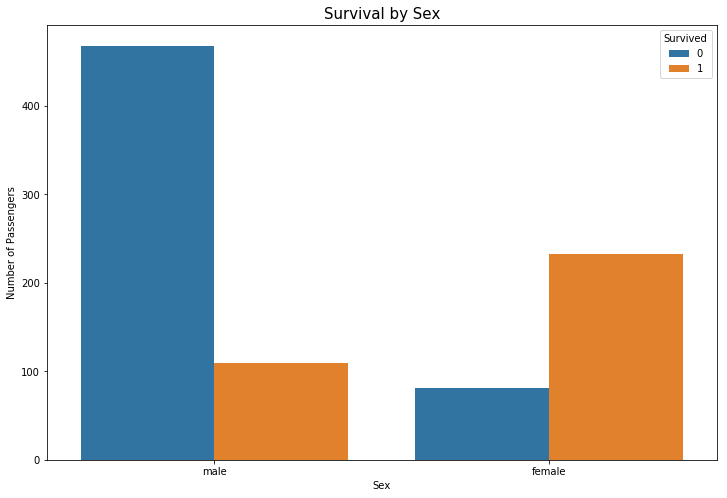

In [10]:
plt.figure(figsize=(12, 8))
sns.countplot(data=train_df, x="Sex", hue="Survived")

plt.xlabel("Sex", size=10)
plt.ylabel("Number of Passengers", size=10)
plt.title("Survival by Sex", size=15)

Text(0.5, 1.0, 'Survival by Title')

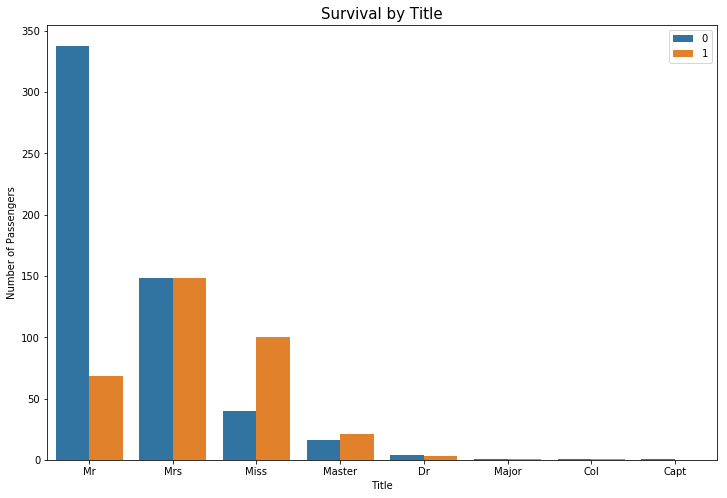

In [11]:
plt.figure(figsize=(12, 8))
sns.countplot(data=train_df, x="Title", hue="Survived")

plt.xlabel("Title", size=10)
plt.ylabel("Number of Passengers", size=10)
plt.legend(loc='upper right')
plt.title("Survival by Title", size=15)

Text(0.5, 1.0, 'Survival by Port of Boarding')

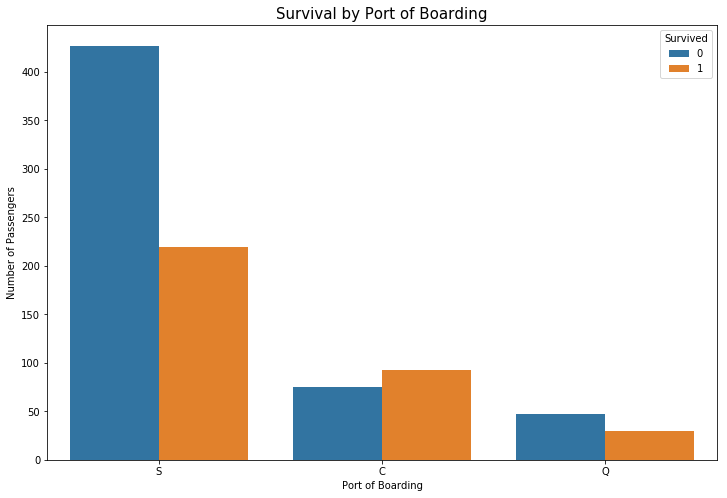

In [12]:
plt.figure(figsize=(12, 8))
sns.countplot(data=train_df, x="Embarked", hue="Survived")

plt.xlabel("Port of Boarding", size=10)
plt.ylabel("Number of Passengers", size=10)
plt.title("Survival by Port of Boarding", size=15)

/Users/varunravivarma/miniconda3/envs/ml/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribution of Fare by Passenger Class')

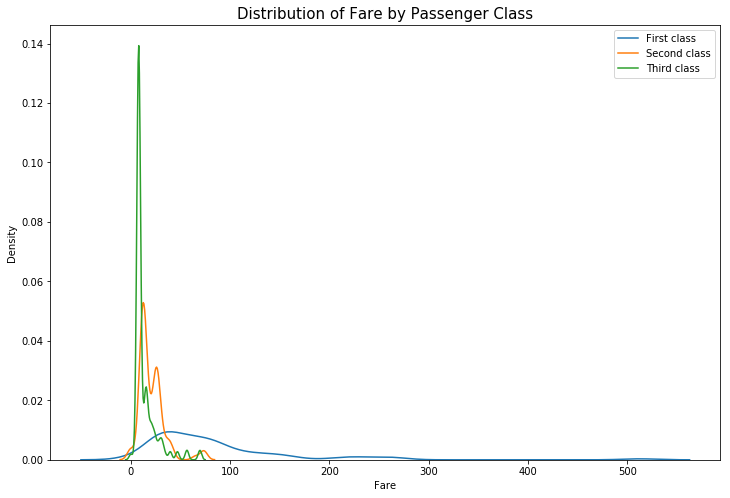

In [14]:
plt.figure(figsize=(12, 8))
sns.kdeplot(train_df[train_df['Pclass']==1]['Fare'], shade=False, label='First class')
sns.kdeplot(train_df[train_df['Pclass']==2]['Fare'], shade=False, label='Second class')
sns.kdeplot(train_df[train_df['Pclass']==3]['Fare'], shade=False, label='Third class')

plt.xlabel("Fare", size=10)
plt.ylabel("Density", size=10)
plt.legend(loc='upper right')
plt.title("Distribution of Fare by Passenger Class", size=15)

Text(0.5, 1.0, 'Distribution of Age by Sex')

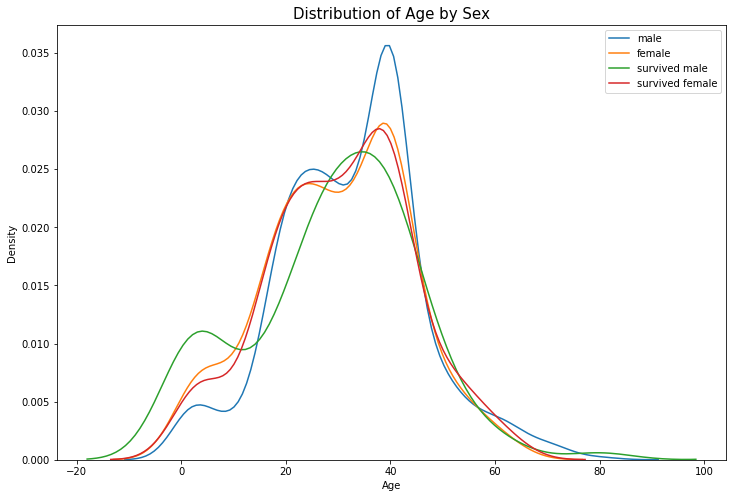

In [24]:
plt.figure(figsize=(12, 8))
sns.kdeplot(train_df[train_df['Sex']=='male']['Age'], shade=False, label='male')
sns.kdeplot(train_df[train_df['Sex']=='female']['Age'], shade=False, label='female')

sns.kdeplot(train_df[(train_df['Sex']=='male') & (train_df['Survived']==1)]['Age'], shade=False, label='survived male')
sns.kdeplot(train_df[(train_df['Sex']=='female') & (train_df['Survived']==1)]['Age'], shade=False, label='survived female')

plt.xlabel("Age", size=10)
plt.ylabel("Density", size=10)
plt.legend(loc='upper right')
plt.title("Distribution of Age by Sex", size=15)

In [16]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title'],
      dtype='object')

In [17]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'Title'],
      dtype='object')

In [18]:
complete_df = train_df.append(test_df, ignore_index=True, sort=False)

complete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Fare           1309 non-null float64
Embarked       1309 non-null object
Title          1309 non-null object
dtypes: float64(3), int64(4), object(3)
memory usage: 102.3+ KB


#### Label Encoding for Categorical Values

Encoding the categorical data in Sex, Title and Embarked columns using Sklearn LabelEncoder. The map pickles are stored in the models directory.

In [19]:
lbl_enc = LabelEncoder()

lbl_enc.fit_transform(complete_df['Sex'])
with open(path.join(MODEL_DIR, SEX_ENC_PKL), 'wb') as file:
    pickle.dump(lbl_enc, file)
complete_df['Sex'] = lbl_enc.transform(complete_df['Sex'])

lbl_enc.fit_transform(complete_df['Title'])
with open(path.join(MODEL_DIR, TITLE_ENC_PKL), 'wb') as file:
    pickle.dump(lbl_enc, file)
complete_df['Title'] = lbl_enc.transform(complete_df['Title'])

lbl_enc.fit_transform(complete_df['Embarked'])
with open(path.join(MODEL_DIR, EMBARKED_ENC_PKL), 'wb') as file:
    pickle.dump(lbl_enc, file)
complete_df['Embarked'] = lbl_enc.transform(complete_df['Embarked'])


complete_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,1,22.0,1,0,7.2500,2,7
1,2,1.0,1,0,38.0,1,0,71.2833,0,8
2,3,1.0,3,0,26.0,0,0,7.9250,2,6
3,4,1.0,1,0,35.0,1,0,53.1000,2,8
4,5,0.0,3,1,35.0,0,0,8.0500,2,7


Saving preprocessed files in order to reuse in model building and predictions

In [20]:
train_df_proc = complete_df[:len(train_df)].copy()
test_df_proc = complete_df[len(train_df):].copy()
test_df_proc.drop(columns=['Survived'], inplace=True)

In [21]:
train_df_proc.to_csv(path.join(DATA_DIR, TRAIN_PROC_FILE), index=None)
test_df_proc.to_csv(path.join(DATA_DIR, TEST_PROC_FILE), index=None)